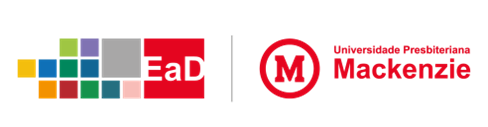

#<font color=blue>PROJETO E ANALISE DE VISUALIZACAO DO CONHECIMENTO

Liliane Gonçalves de Brito Ferraz - 10407087

A2 – Aplicando Conhecimento

Selecione a base de dados Space X Missions no Kaggle, construa um gráfico de Série temporal sobre os lançamentos de foguetes desta empresa e faça uma predição de lançamentos para 2023. Explique os resultados considerando Tendência, Sazonalidade e Aleatoriedade dos dados.  
O produto deve conter: metadados, análise exploratória, o gráfico com especificação da ferramenta utilizada e a análise dos resultados

In [29]:
# Importando bibliotecas e pacotes a serem utilizados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import chardet
!pip install missingno  | grep -v 'already satisfied'
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Importar o arquivo de dados e visualizar as primeiras linhas
dados = pd.read_csv("/content/drive/My Drive/database.csv")
dados.head(3)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN


In [31]:
#Verificar quantidade de linhas e colunas do dataframe
dados.shape

(41, 16)

In [32]:
#Verificar os atributos do dataframe
dados.columns.to_list()

['Flight Number',
 'Launch Date',
 'Launch Time',
 'Launch Site',
 'Vehicle Type',
 'Payload Name',
 'Payload Type',
 'Payload Mass (kg)',
 'Payload Orbit',
 'Customer Name',
 'Customer Type',
 'Customer Country',
 'Mission Outcome',
 'Failure Reason',
 'Landing Type',
 'Landing Outcome']

In [33]:
#Verificar os tipos dos atributos do dataframe
dados.dtypes

Flight Number         object
Launch Date           object
Launch Time           object
Launch Site           object
Vehicle Type          object
Payload Name          object
Payload Type          object
Payload Mass (kg)    float64
Payload Orbit         object
Customer Name         object
Customer Type         object
Customer Country      object
Mission Outcome       object
Failure Reason        object
Landing Type          object
Landing Outcome       object
dtype: object

In [35]:
#Verificar informações estatísticas do dataframe
%matplotlib inline
my_colors = ['#002D5F' ,'#B4AAA6',"#E4E1EB" ,'#255887','#7B6454']
newcmp = ListedColormap(my_colors)
newcmp
dados.describe().style.background_gradient(cmap = newcmp)

,Payload Mass (kg)
count,33.000000
mean,2739.772727
std,2131.502973
min,8.000000
25%,570.000000
50%,2490.000000
75%,4159.000000
max,9600.000000


In [36]:
#Verificar valores únicos de cada atributo do dataframe
dados.nunique()

Flight Number        36
Launch Date          36
Launch Time          35
Launch Site           4
Vehicle Type          4
Payload Name         41
Payload Type          7
Payload Mass (kg)    30
Payload Orbit         4
Customer Name        18
Customer Type         2
Customer Country     11
Mission Outcome       2
Failure Reason        6
Landing Type          5
Landing Outcome       2
dtype: int64

In [37]:
#Verificar as informações de um atributo do dataframe
dados.loc[0]

Flight Number                             F1-1
Launch Date                      24 March 2006
Launch Time                              22:30
Launch Site                   Marshall Islands
Vehicle Type                          Falcon 1
Payload Name                       FalconSAT-2
Payload Type                Research Satellite
Payload Mass (kg)                         19.5
Payload Orbit                              NaN
Customer Name                            DARPA
Customer Type                       Government
Customer Country                 United States
Mission Outcome                        Failure
Failure Reason       Engine Fire During Launch
Landing Type                               NaN
Landing Outcome                            NaN
Name: 0, dtype: object

In [38]:
# Verificar valores nulos do dataframe
dados.isnull().sum()

Flight Number         0
Launch Date           0
Launch Time           0
Launch Site           0
Vehicle Type          0
Payload Name          0
Payload Type          3
Payload Mass (kg)     8
Payload Orbit         5
Customer Name         2
Customer Type         2
Customer Country      2
Mission Outcome       0
Failure Reason       33
Landing Type         13
Landing Outcome      20
dtype: int64

<Axes: >

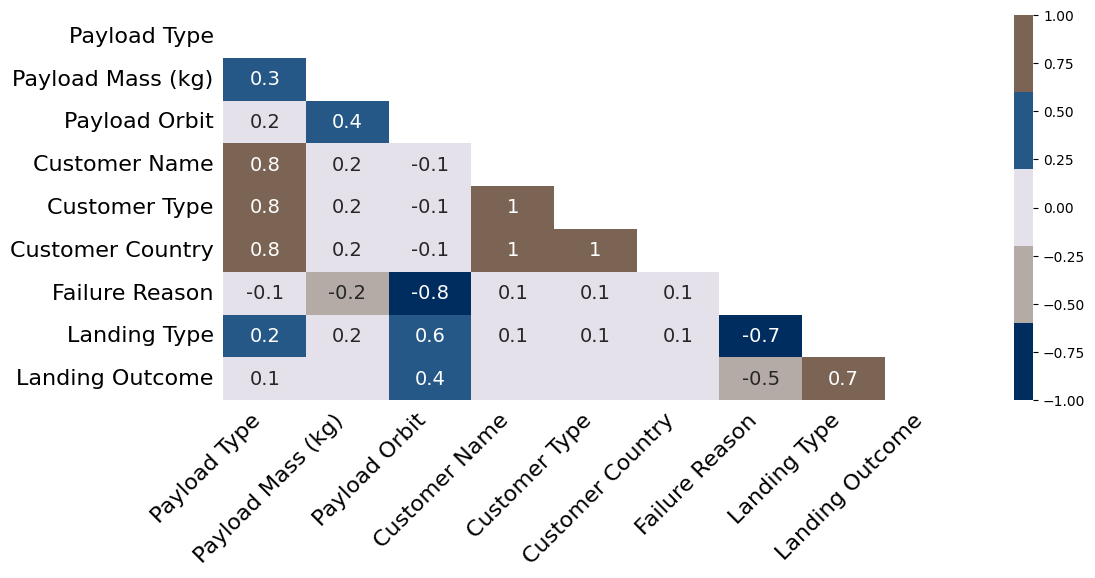

In [40]:
#Apresentar a distribuição dos valores ausentes, usando o mapa de calor.
msno.heatmap(dados,figsize=(12,5),cmap = newcmp)

<Axes: >

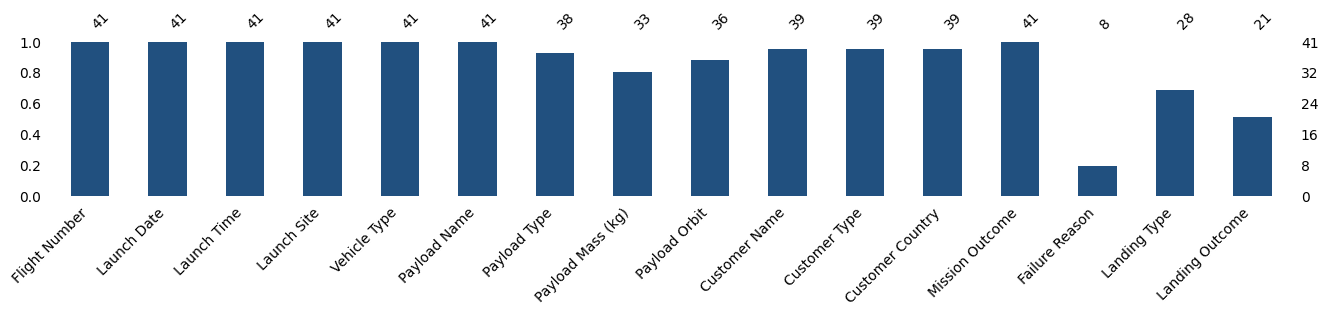

In [41]:
# Verificar valores nulos do dataframe de forma gráfica
msno.bar(dados,color ='#21507F',labels= "null values",figsize=(16,2)
         ,fontsize= 10)

In [42]:
#Retirando os valores nulos do dataframe
dados = dados.dropna(subset=['Payload Mass (kg)'])

<Axes: >

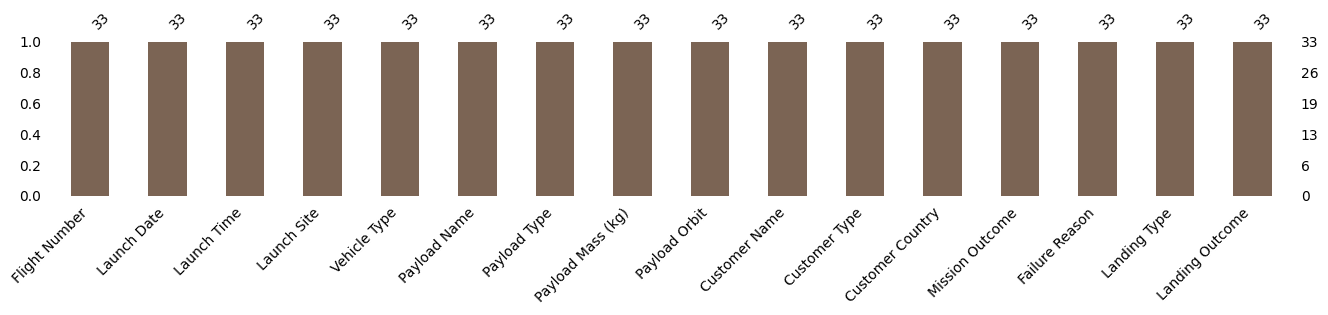

In [43]:
#Apresentado o dataframe sem os valores nulos
dados.fillna(0, inplace = True)
msno.bar(dados,color ='#7B6454',labels= "null values",figsize=(16,2)
         ,fontsize= 10)

<ipython-input-44-70a8aab716c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.corr()


<Axes: >

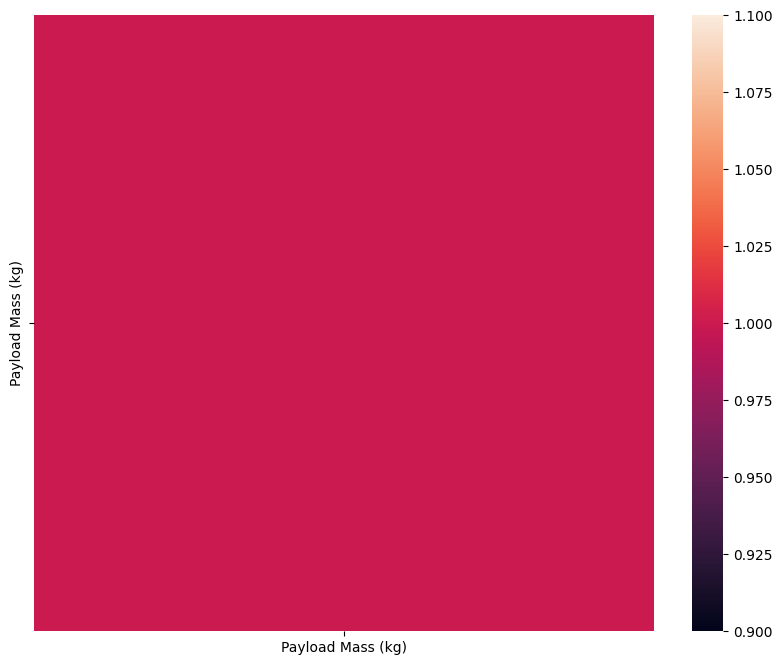

In [44]:
#Apresentar a matriz de correlação dos dados, usando o mapa de calor.
f, ax = plt.subplots(figsize=(10, 8))
corr = dados.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

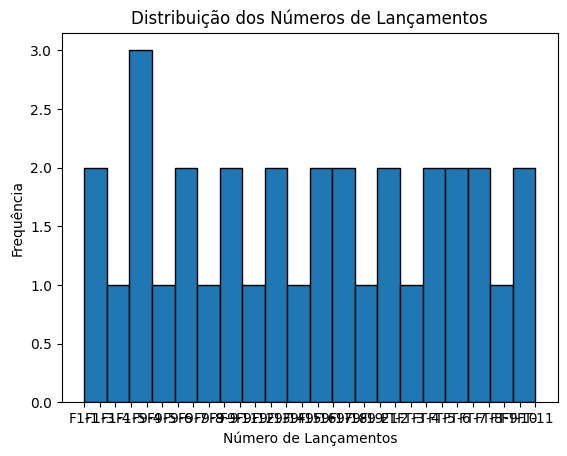

In [65]:
#Histograma dos números de lançamentos para entender a distribuição.
plt.hist(dados['Flight Number'], bins=20, edgecolor='black')
plt.title('Distribuição dos Números de Lançamentos')
plt.xlabel('Número de Lançamentos')
plt.ylabel('Frequência')
plt.show()

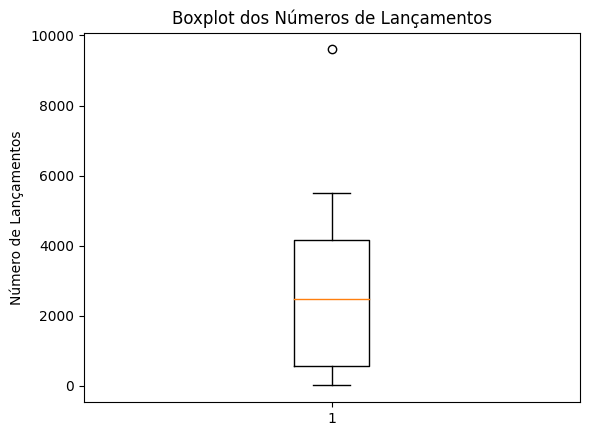

In [46]:
#Box plot para identificar outliers nos números de massa da carga útil
plt.boxplot(dados['Payload Mass (kg)'])
plt.title('Boxplot dos Números de Lançamentos')
plt.ylabel('Número de Lançamentos')
plt.show()

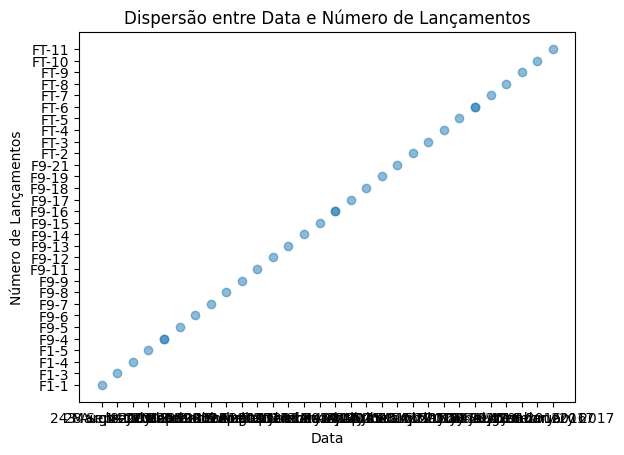

In [47]:
#Gráfico de dispersão entre a data e o número de lançamentos para identificar correlações.
plt.scatter(dados['Launch Date'], dados['Flight Number'], alpha=0.5)
plt.title('Dispersão entre Data e Número de Lançamentos')
plt.xlabel('Data')
plt.ylabel('Número de Lançamentos')
plt.show()

#<font color=green>Treinamento do Modelo Preditivo

In [48]:
#Importanto bibliotecas para criação e teste do modelo de predição
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
# Convertendo a coluna 'Launch Date' para o tipo data
dados['Launch Date'] = pd.to_datetime(dados['Launch Date'], dayfirst=True)
# criar nova colunas para ano
dados['Ano'] = dados['Launch Date'].dt.strftime('%Y')

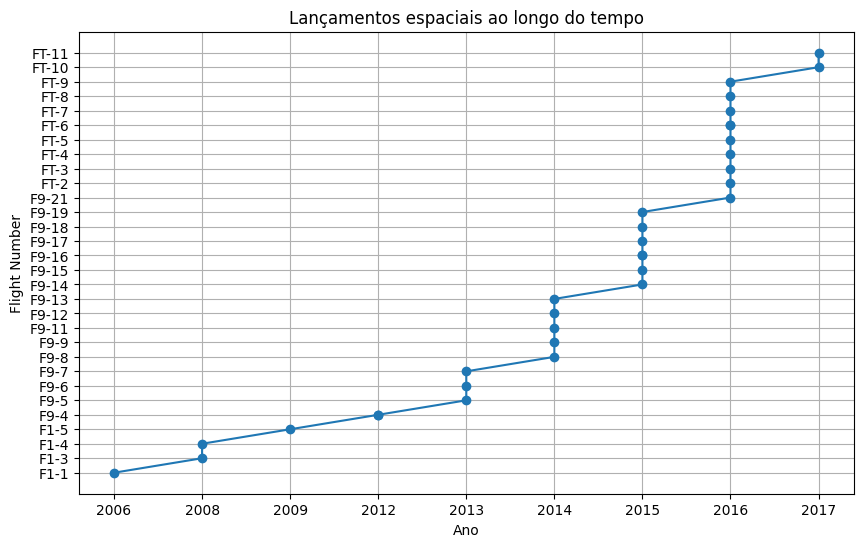

In [50]:
# Criando gráfico de série temporal dos lançamentos
plt.figure(figsize=(10, 6))
plt.plot(dados['Ano'], dados['Flight Number'], marker='o', linestyle='-')
plt.title('Lançamentos espaciais ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Flight Number')
plt.grid(True)
plt.show()


In [51]:
# Preparando os dados para predição
X = dados['Launch Date'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = dados['Payload Mass (kg)'].values

In [52]:
# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Fazendo previsão para 2023
ordinal_date_2023 = pd.to_datetime('2023-01-01').toordinal()
predicted_Payload_Mass_2023 = model.predict([[ordinal_date_2023]])[0]

print("Previsão de lançamentos da SpaceX para 2023 é de:", int(predicted_Payload_Mass_2023))

Previsão de lançamentos da SpaceX para 2023 é de: 6208


#<font color=green>Conclusão

O resultado de 6208 significa que o modelo prevê que a SpaceX fará aproximadamente 6208 lançamentos em 2023, com base na massa do payload.

A interpretação do resultado de 6208 lançamentos em 2023 depende da confiança na validade dos dados, nas assunções do modelo e na consideração de outros fatores relevantes. Se os dados forem confiáveis e representativos, e se a relação entre a massa do payload e o número de lançamentos for forte e estável, então o resultado pode ser considerado útil como uma estimativa inicial.


#<font color=green>Análise Geral

1. **Tendência:** O modelo de regressão linear assume uma relação linear entre as variáveis independentes e dependentes. A tendência linear é clara nos dados de massa de carga útil ao longo do tempo, o modelo pode ser adequado para prever lançamentos com base nesse padrão.

2. **Sazonalidade:** A regressão linear não leva em conta padrões sazonais nos dados. Mesmo havendo padrões sazonais nos lançamentos da SpaceX ao longo do ano que não sejam capturados pelo modelo, as previsões podem não ser precisas.

3. **Aleatoriedade:** Se houver muita variação nos dados que não pode ser explicada pela massa de carga úti, o modelo pode não capturar adequadamente essa aleatoriedade. Isso pode levar a previsões imprecisas, especialmente se houver fatores desconhecidos que afetem os lançamentos.

Portanto, enquanto a regressão linear pode fornecer uma previsão inicial com base na massa de carga úti, é importante considerar outras variáveis e técnicas de modelagem mais avançadas para capturar melhor a complexidade dos dados e melhorar a precisão das previsões.